In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys


import mygabasic as ga
 
%aimport mygabasic

HOlA MYGABASIC


# Open Loop

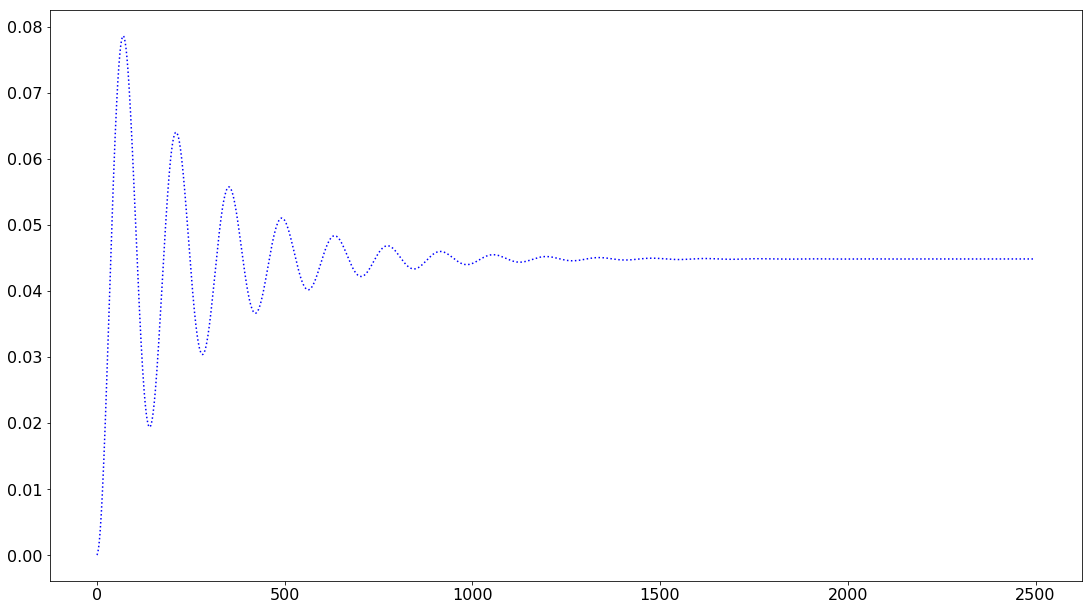

In [2]:


def zyz3():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(2500):
        X[0] = 1
        Y[0] = X[2]*4.475e-5 + X[1]*4.487e-5 + Y[2]*(-0.992) + Y[1]*1.99
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out



zyz3Ite,zyz3Out = zyz3()

plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(zyz3Ite),
         np.squeeze(zyz3Out),
         'b:') 
plt.savefig('DynamicsOpenLoop001.pdf', format='pdf')
plt.show()

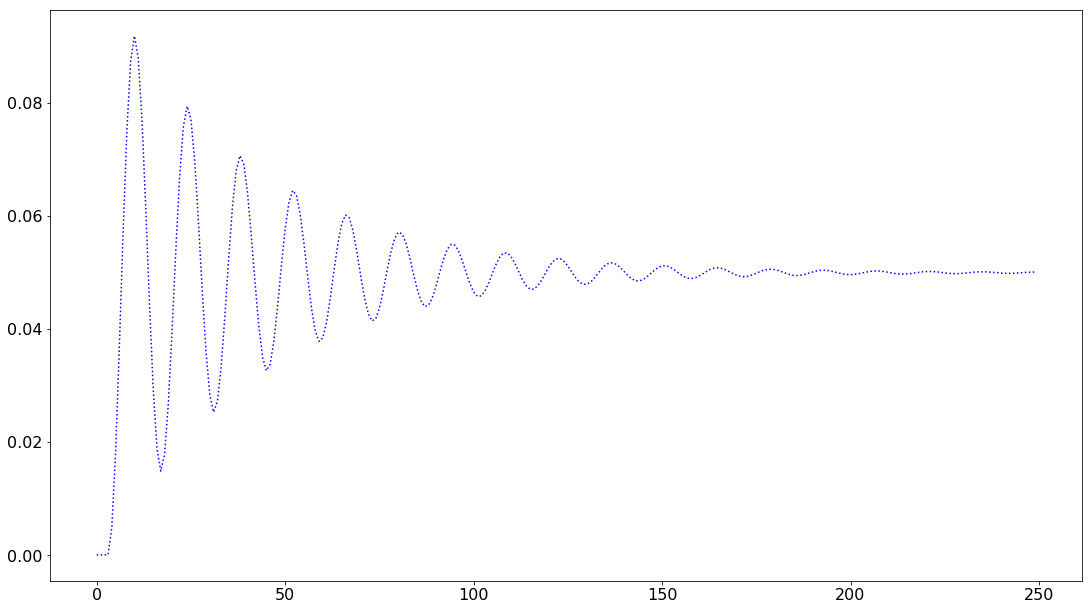

In [3]:


def zyz1():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

def zyz2():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[3]*0.00419 + X[2]*0.00431 + Y[2]*(-0.9231) + Y[1]*1.734
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

zyz1Ite,zyz1Out = zyz1()
zyz2Ite,zyz2Out = zyz2()
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
"""
plt.plot(np.squeeze(zyz1Ite),
         np.squeeze(zyz1Out),
         'b:',
         np.squeeze(zyz2Ite),
         np.squeeze(zyz2Out),
         'g:') 
"""
plt.plot(np.squeeze(zyz1Ite),
         np.squeeze(zyz1Out),
         'b:') 
plt.savefig('DynamicsOpenLoop.pdf', format='pdf')
plt.show()

# Closed Loop

In [9]:
# def zyz1CloseLoop(P=0,Ki=18.52677354,Kd=0.30084384):
# def zyz1CloseLoop(P=0.03440869,Ki= 17.27241234,Kd=0):
# def zyz1CloseLoop(P=0,Ki=18.11434344,Kd=0.42478245):
# def zyz1CloseLoop(P=0,Ki=17.74563931,Kd=0):


def zyz1CloseLoop(P=0,Ki=18.62142993,Kd=0.31548802):
    UPPER_BOUND = 1000
    iDt = 0.1
    dDt = 0.1
    itrationRange = 250
    X = np.zeros(6)
    Y = np.zeros(6)
    SetPoint = 1
    Iterations = []
    # Proces Out
    Out = []
    # Control out sigma/component
    Count = []
    ErrSum = 0
    prevErr = 0
    Iout = 0
    # Inittial Control Out 
    err = SetPoint - Y[0]
    ErrSum = ErrSum + ((err*err)/2)
    Pout = err*P
    Dout = 0
    prevErr = err
    Iout = Iout + err*iDt*Ki
    X[0] = Pout + Dout + Iout
    for i in range(itrationRange):
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        # Y[0] = X[2]*4.475e-5 + X[1]*4.487e-5 + Y[2]*(-0.992) + Y[1]*1.99
        if Y[0] > UPPER_BOUND:
            Y[0] = UPPER_BOUND
        Iterations.append(i)
        Out.append(Y[0])
        Count.append(Dout)
        err = SetPoint - Y[0]
        ErrSum = ErrSum + ((err*err)/2)
        # Over peak penalization
        if err < 0:
            ErrSum = ErrSum + ((err*err)*5) 
            # ErrSum = ErrSum + ((err*err))  
        Pout = err*P
        Dout = ((err - prevErr)/dDt)*Kd
        prevErr = err
        Iout = Iout + err*iDt*Ki
        Y = np.roll(Y, 1)
        X = np.roll(X, 1)
        X[0] = Pout + Dout + Iout
        
    return Iterations,Out,Count,ErrSum

def wrappedzyz1CloseLoop(fevalMtx):
    _,_,_,new = zyz1CloseLoop(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0]);
    return new

def zyz1CloseLoopBinString(binString):
    codeLen = 32 
    cromoSize = binString.shape[0]
    col = int(cromoSize/codeLen)
    splitPop = binString.reshape((col,codeLen))
    # print(splitPop)
    fevalMtx = [[ga.gdeco(bitlist = dim, minVal = 0, maxVal = 600, codeLen = codeLen)] for dim in splitPop]
    # print(fevalMtx)
    rval =  wrappedzyz1CloseLoop(fevalMtx)
    # print(rval)
    return rval

5.137938237884782


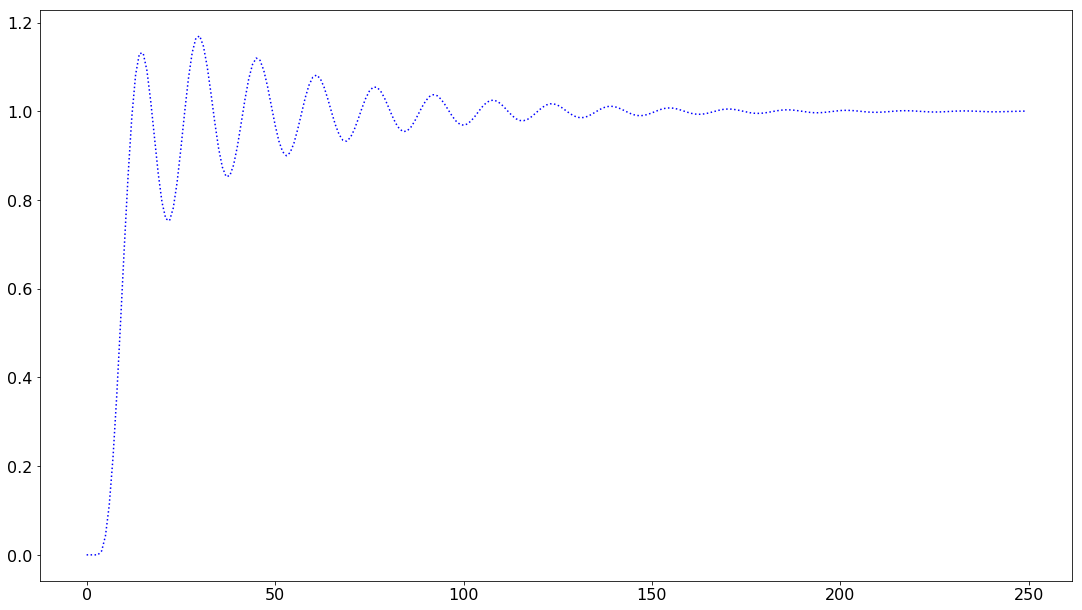

In [5]:

Iterations,Out,Count,ErrSum = zyz1CloseLoop(P=6.98491931e-08,Ki=1.87501433e+01,Kd=3.11192614e-01)

print(ErrSum)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(Iterations),
         np.squeeze(Out),
         'b:')
plt.savefig('DynamicHAEA.pdf', format='pdf')
plt.show()

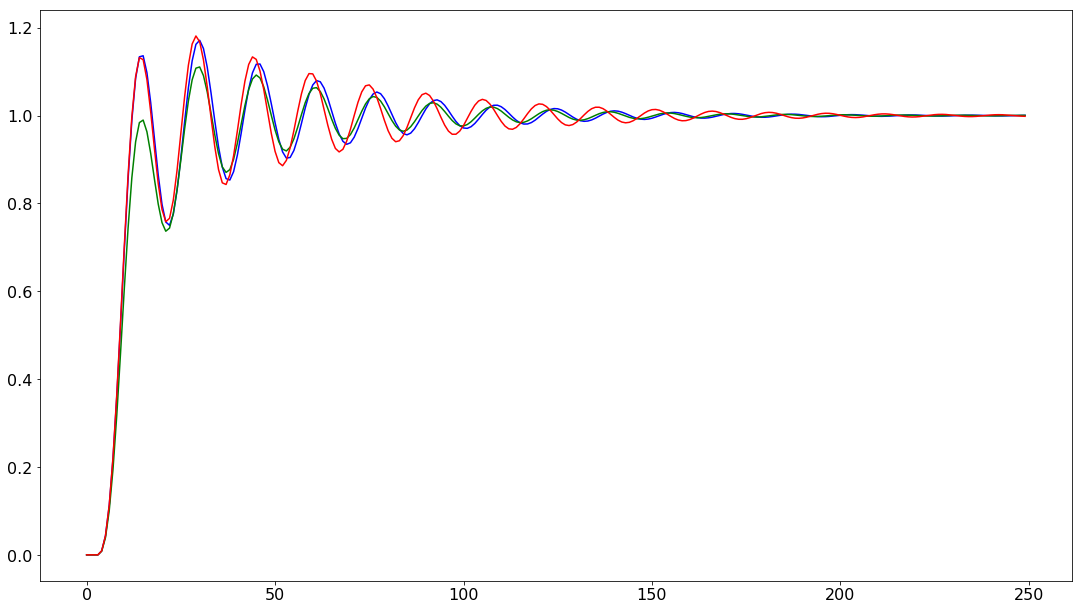

In [21]:
Iterations1,Out1,Count1,ErrSum1 = zyz1CloseLoop(P=6.936e-05,Ki=18.75,Kd=0.264)
Iterations2,Out2,Count2,ErrSum2 = zyz1CloseLoop(P=0.135,Ki=16.03,Kd=0.16)
Iterations3,Out3,Count3,ErrSum3 = zyz1CloseLoop(P=7e-08,Ki=19,Kd=0.5)

plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(Iterations1),
         np.squeeze(Out1),
         'b',
         np.squeeze(Iterations1),
         np.squeeze(Out2),
         'g',
         np.squeeze(Iterations1),
         np.squeeze(Out3),
         'r')
plt.savefig('DynamicSolutions.pdf', format='pdf')
plt.show()

In [6]:
UPPER_VAL_LIMIT = 600
def rdmGauss(sigma = 0.2, mu = 0):
    return np.random.normal(mu, sigma, 1)

# http://mathworld.wolfram.com/RandomNumber.html
# https://stackoverflow.com/questions/918736/random-number-generator-that-produces-a-power-law-distribution
def rdmSimetricPoerLow(x1 = 3, x0 = 0.1, alpha = -1.5):
    y = np.random.uniform(0,1,1)
    x = math.pow((math.pow(x1, (alpha + 1)) - math.pow(x0, (alpha + 1)))*y + math.pow(x0, (alpha + 1)),(1/(alpha+1)))
    sign = np.random.uniform(0,1,1)
    return x if sign > 0.5 else -x

def min_HillClimbing(fevalMtx,sigma = 0.7, function = None):
    Y = np.copy(fevalMtx)
    for y in Y:
        y[0] = y[0] + rdmGauss(sigma = sigma)
        
        if y[0] < 0 :
            y[0] = 0
        elif y[0] > UPPER_VAL_LIMIT:
            y[0] = UPPER_VAL_LIMIT
    
    _,_,_,prev = function(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0])
    _,_,_,new = function(P=Y[0][0],Ki=Y[1][0],Kd=Y[2][0]);
    
    if new <= prev:
        return new, Y
    else:
        return prev, fevalMtx
    
    
def min_PowerLaw(fevalMtx,  x1 = 20, x0 = 0.5, alpha = -1.5, function = None):
    Y = np.copy(fevalMtx)
    for y in Y:
        y[0] = y[0] + rdmSimetricPoerLow( x1 = x1, x0 = x0, alpha = alpha)
        
        if y[0] < 0 :
            y[0] = 0
        elif y[0] > UPPER_VAL_LIMIT:
            y[0] = UPPER_VAL_LIMIT

    _,_,_,prev = function(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0])
    _,_,_,new = function(P=Y[0][0],Ki=Y[1][0],Kd=Y[2][0]);
    
    if new <= prev:
        return new, Y
    else:
        return prev, fevalMtx
    
    
def sa(energyfunc, initials, epochs, tempfunc, iterfunc, proposalfunc,sigma = 0.75,x1 = 20,x0 = 0.5,alpha = -1.5):
    # out plot
    OUT_List_Simanneal = []
    Iterations = []
    
    accumulator=[]
    best_solution = old_solution = initials['solution']
    T=initials['T']
    length=initials['length']
    _,_,_,best_energy = energyfunc(P=old_solution[0][0],Ki=old_solution[1][0],Kd=old_solution[2][0])
    _,_,_,old_energy = energyfunc(P=old_solution[0][0],Ki=old_solution[1][0],Kd=old_solution[2][0])
    accepted=0
    total=0
    
    best_index=total
    best_temp=T
    
    
    for index in range(epochs):
        # print("Epoch", index)
        if index > 0:
            T = tempfunc(T)
            length=iterfunc(length)
            sys.stdout.write("\r Temperature " + str(T))
            sys.stdout.flush()
        # print("Temperature", T, "Length", length)
        for it in range(length):
            Iterations.append(total)
            OUT_List_Simanneal.append(old_energy)
            total+=1
            new_solution = np.copy(old_solution)
            for y in new_solution:
                if proposalfunc == 'rdmGauss':
                    y[0] = y[0] + rdmGauss(sigma = sigma)
                else:
                    y[0] = y[0] + rdmSimetricPoerLow(x1 = x1, x0 = x0, alpha = alpha)
                if y[0] < 0 :
                    y[0] = 0
                elif y[0] > UPPER_VAL_LIMIT:
                    y[0] = UPPER_VAL_LIMIT
                    
            # new_solution = proposalfunc(old_solution)
            _,_,_,new_energy = energyfunc(P=new_solution[0][0],Ki=new_solution[1][0],Kd=new_solution[2][0])
            # Use a min here as you could get a "probability" > 1
            alphaLoc = min(1, np.exp((old_energy - new_energy)/T))
            if ((new_energy < old_energy) or (np.random.uniform() < alphaLoc)):
                # Accept proposed solution
                accepted+=1
                accumulator.append((T, new_solution, new_energy))
                #OUT_List_Simanneal.append(new_energy)
                if new_energy < best_energy:
                    # Replace previous best with this one
                    best_energy = new_energy
                    best_solution = new_solution
                    best_index=total
                    best_temp=T
                old_energy = new_energy
                old_solution = new_solution
            else:
                # Keep the old stuff
                accumulator.append((T, old_solution, old_energy))
                #OUT_List_Simanneal.append(old_energy)
    
    best_meta=dict(index=best_index, temp=best_temp)
    # print("frac accepted", accepted/total, "total iterations", total, 'bmeta', best_meta)
    return best_meta, best_solution, best_energy, accumulator, OUT_List_Simanneal, Iterations

# Hill Climbing

 Iteration 29

mean: 801382599.1286793
std: 693186686.88845
median: 338766041.1236996
min: 248736626.69222707
max: 2080039731.5413516
[[0.]
 [0.]
 [0.]]
100000000


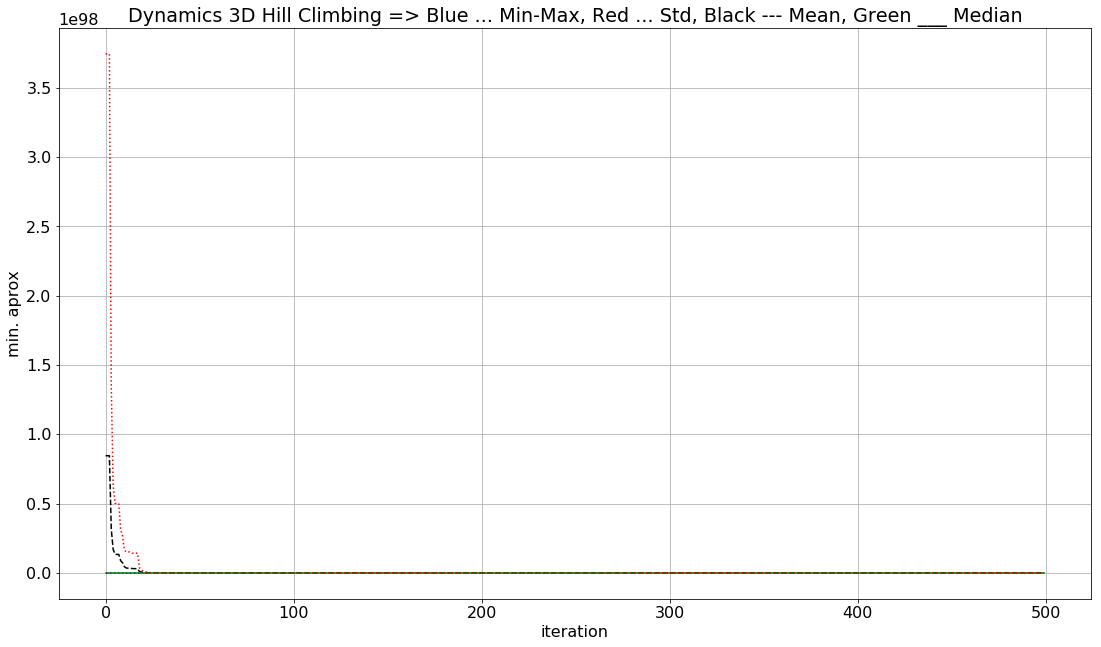

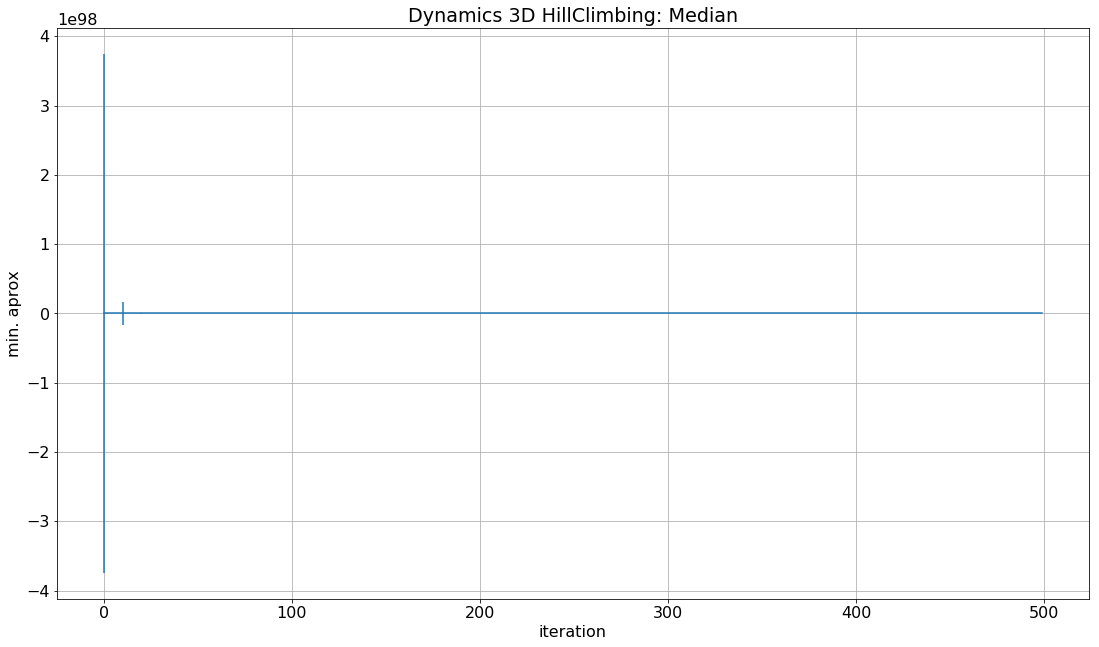

In [164]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 500
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    
repetitions = 30
OUT_Matrix = np.zeros((repetitions, iterSize))
iniRef = 100000000
bestVal =   np.zeros((3, 1))  

for j in range(0, repetitions):
    Iterations = []
    
    fevalRdm =  np.random.uniform(low=0, high=600, size=(valVectorSize, 1))
    delta = np.zeros((valVectorSize, 1))
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    for i in range(0, iterSize):
        OUT, fevalRdm = min_HillClimbing(fevalRdm, sigma = 7, function = zyz1CloseLoop)
        OUT_Matrix[j][i] = OUT
        Iterations.append(i)
    
    if OUT < iniRef:
        bestVal = np.copy(fevalRdm)
        iniRef = OUT
        
    Best_List.append(OUT)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Hill Climbing => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsHillClimbing_3d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D HillClimbing: Median")
plt.grid()
plt.savefig('DynamicsHillClimbingStd_2d.pdf', format='pdf')
plt.show()

# Hill Climbing with Power Law

 Iteration 29

mean: 3.6324819860254025e+66
std: 1.9558916692935944e+67
median: 1109998090.8460467
min: 125.5
max: 1.08960471299242e+68
[[  0.        ]
 [  0.        ]
 [327.99432653]]
125.5


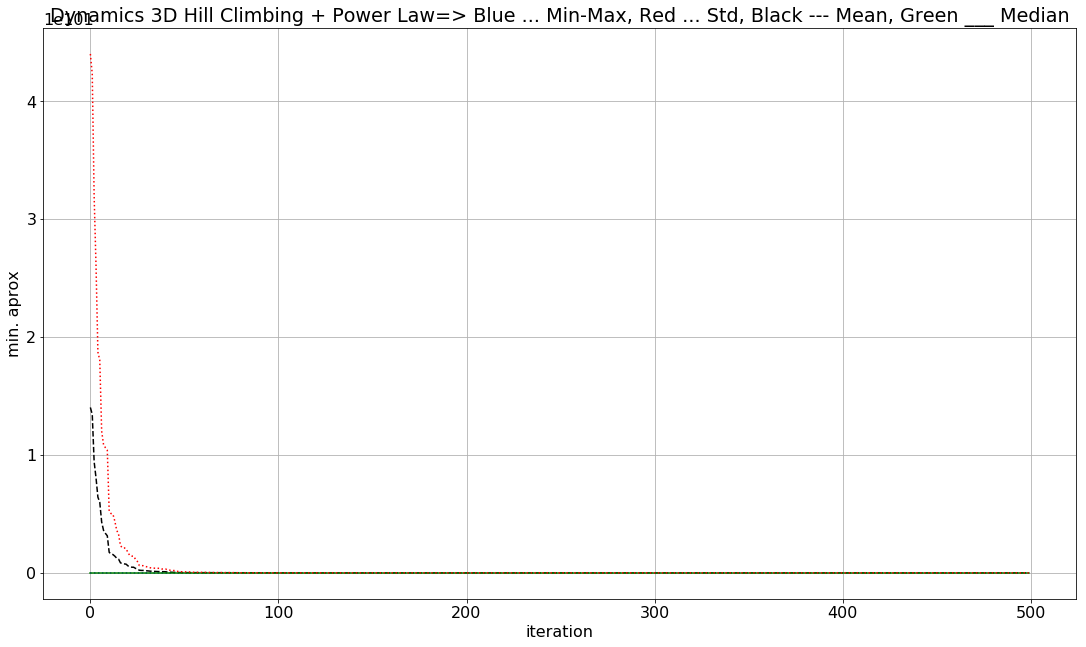

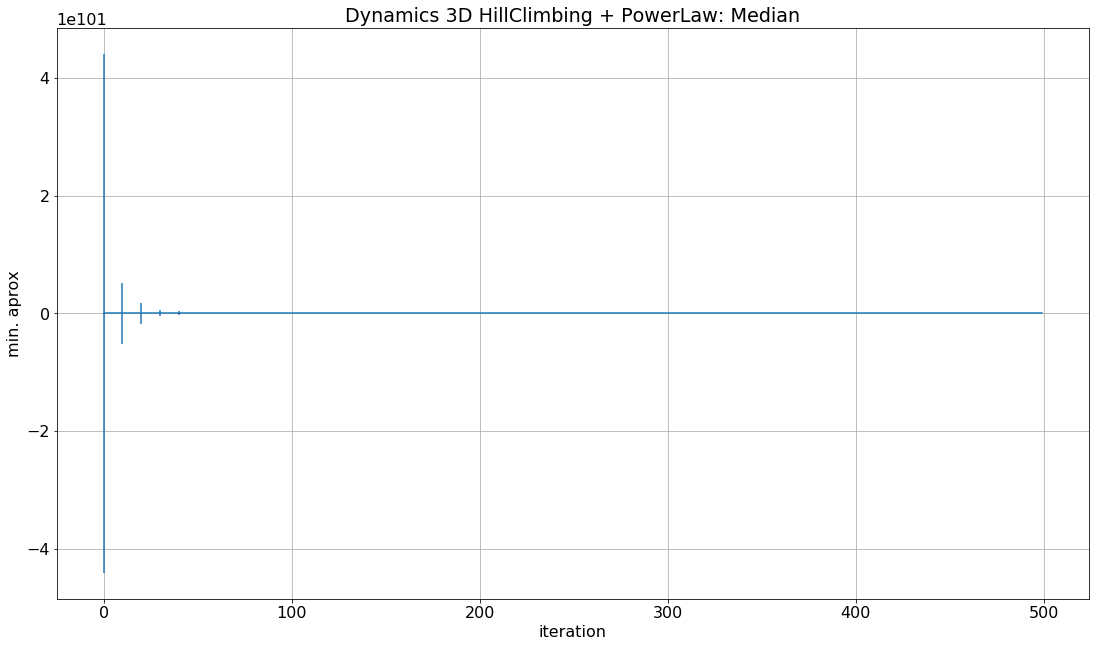

In [165]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 500
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    
repetitions = 30
OUT_Matrix = np.zeros((repetitions, iterSize))
iniRef = 100000000
bestVal =   np.zeros((3, 1))  

for j in range(0, repetitions):
    Iterations = []
    
    fevalRdm =  np.random.uniform(low=0, high=600, size=(valVectorSize, 1))
    delta = np.zeros((valVectorSize, 1))
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    for i in range(0, iterSize):
        OUT, fevalRdm = min_PowerLaw(fevalRdm, x1 = 10, x0 = 1, alpha = -2, function = zyz1CloseLoop)
        OUT_Matrix[j][i] = OUT
        Iterations.append(i)
    
    if OUT < iniRef:
        bestVal = np.copy(fevalRdm)
        iniRef = OUT
        
    Best_List.append(OUT)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Hill Climbing + Power Law=> Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsHillClimbingPowerLaw_3d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D HillClimbing + PowerLaw: Median")
plt.grid()
plt.savefig('DynamicsHillClimbingPowerLawStd_2d.pdf', format='pdf')
plt.show()

# Simulated annealing + Normal
## 3D

 Temperature 0.390625

mean: 4.16019075691841e+62
std: 2.2339470869616602e+63
median: 1718490344.5645075
min: 240585227.91312817
max: 1.2446151658871769e+64
[[0.]
 [0.]
 [0.]]
100000000


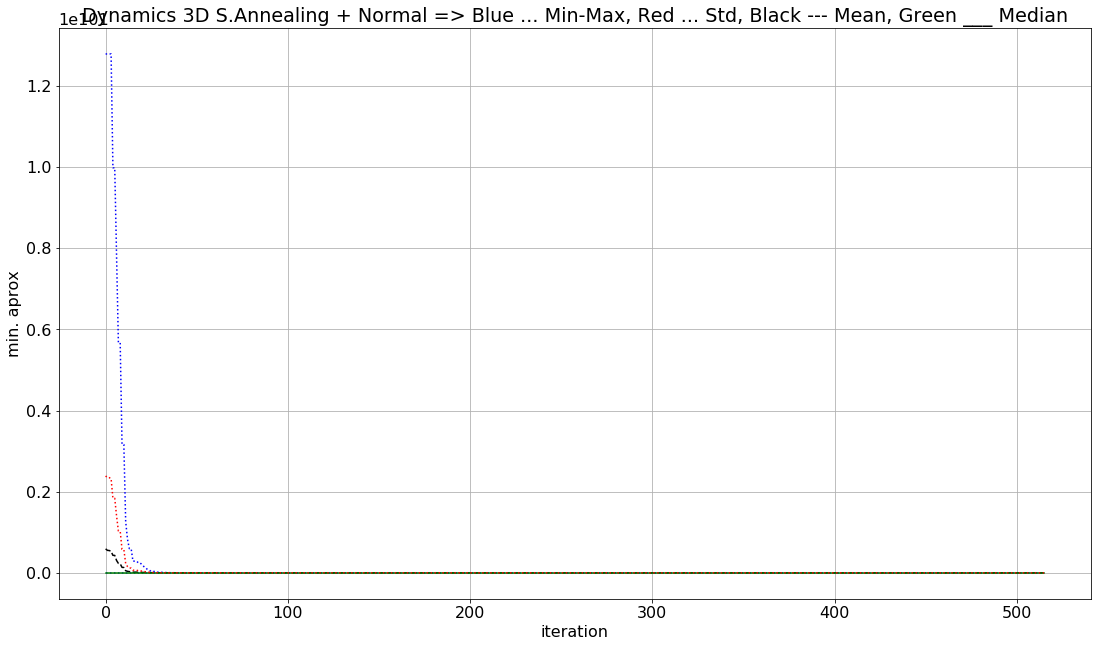

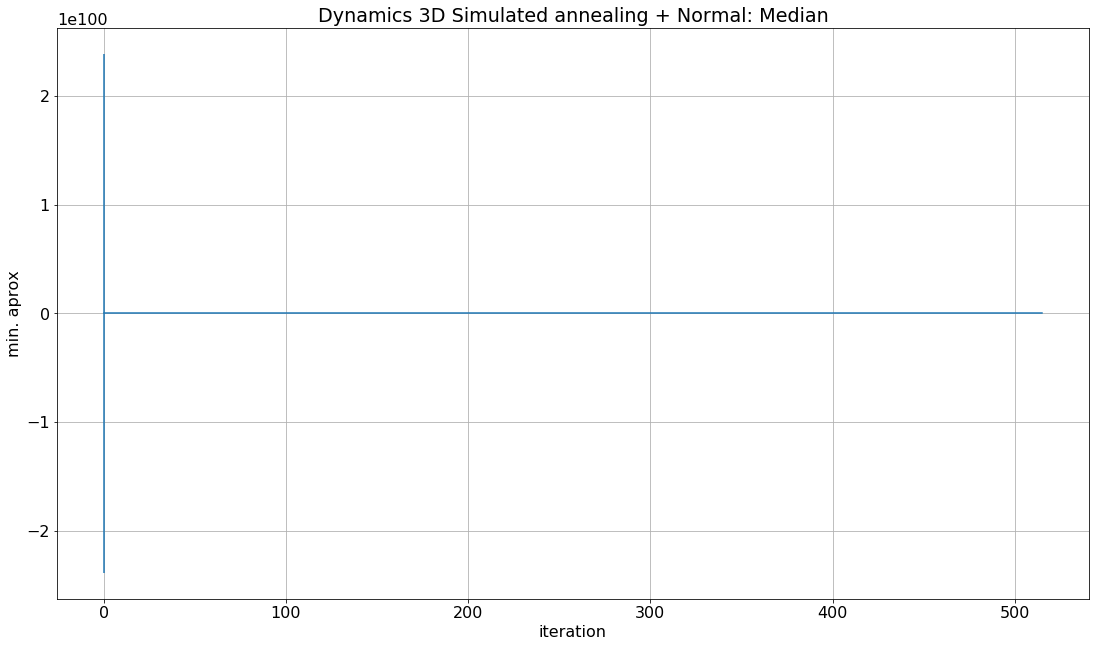

In [174]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 200
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    

iniRef = 100000000
bestVal =   np.zeros((3, 1))  

repetitions = 30
OUT_Matrix = None
OutIniFlag = False

tf = lambda t: 0.5*t #temperature function
itf = lambda length: math.ceil(1.5*length) #iteration function

for j in range(0, repetitions):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    fevalRdm =  np.random.uniform(low=0, high=UPPER_VAL_LIMIT, size=(valVectorSize, 1))
    # inits=dict(solution=fevalRdm, length=100, T=100)
    inits=dict(solution=fevalRdm, length=10, T=50)
    OUT_List_Simanneal_Tmp = []
    bmeta, bs, be, out, OUT_List_Simanneal, Iterations = sa(zyz1CloseLoop,
                                                                inits,
                                                                SimannealItrSize,
                                                                tf,
                                                                itf,
                                                                'rdmGauss',
                                                                sigma = 7,
                                                                x1 = 4,
                                                                x0 = 0.1,
                                                                alpha = -1.5)
    if be < iniRef:
        bestVal = np.copy(bs)
        iniRef = be
    
    Best_List.append(be)
    if OutIniFlag == False:
        OutIniFlag = True
        OUT_Matrix = np.asarray(OUT_List_Simanneal).reshape(1,-1)
    else:
        OUT_Matrix = np.concatenate((OUT_Matrix, np.asarray(OUT_List_Simanneal).reshape(1,-1)), axis=0)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(np.amax(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D S.Annealing + Normal => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsSAnnealNrm_2d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:50] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Simulated annealing + Normal: Median")
plt.grid()
plt.savefig('DynamicsSAnnealNrmStd_2d.pdf', format='pdf')
plt.show()

# Simulated annealing + Power Law
## 3D

 Temperature 0.390625

mean: 4.272491514945992e+68
std: 2.3006345000840372e+69
median: 1889923334.4489326
min: 244159167.31917486
max: 1.2816545066834515e+70
[[0.]
 [0.]
 [0.]]
100000000


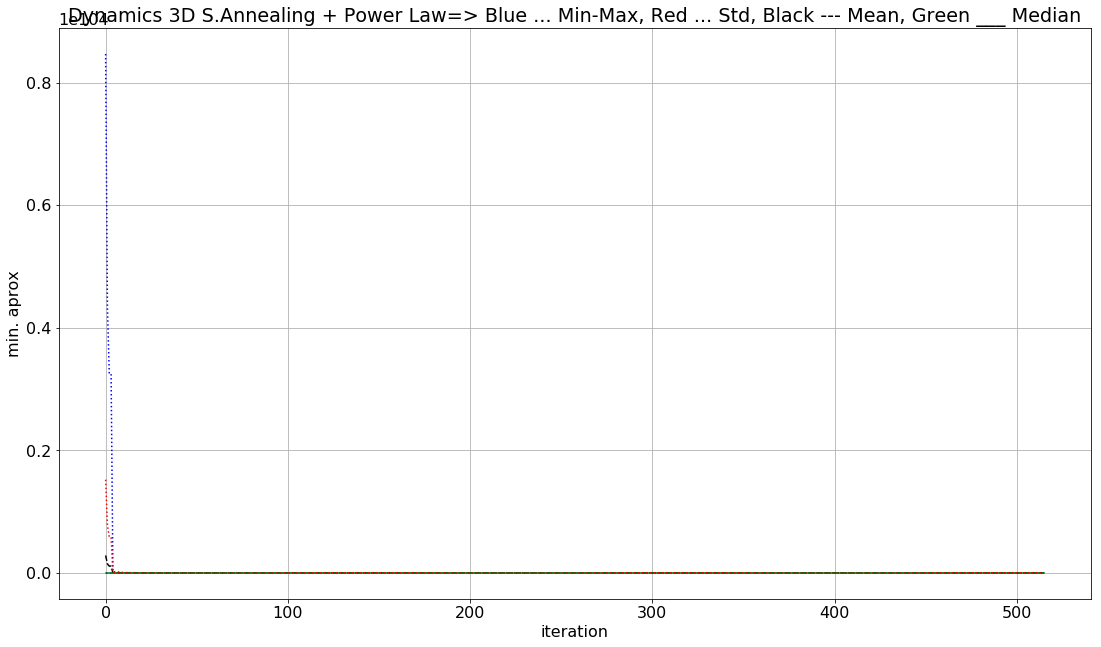

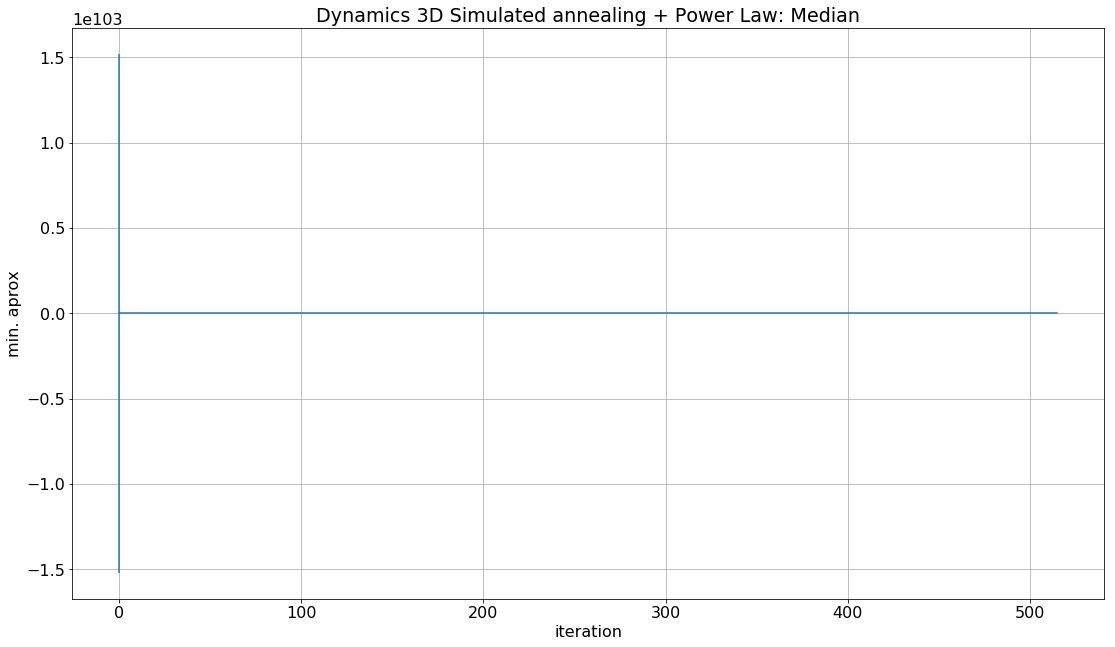

In [167]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 500
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    

iniRef = 100000000
bestVal =   np.zeros((3, 1))  

repetitions = 30
OUT_Matrix = None
OutIniFlag = False

tf = lambda t: 0.5*t #temperature function
itf = lambda length: math.ceil(1.5*length) #iteration function

for j in range(0, repetitions):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    fevalRdm =  np.random.uniform(low=0, high=UPPER_VAL_LIMIT, size=(valVectorSize, 1))
    inits=dict(solution=fevalRdm, length=10, T=50)
    OUT_List_Simanneal_Tmp = []
    bmeta, bs, be, out, OUT_List_Simanneal, Iterations = sa(zyz1CloseLoop,
                                                                inits,
                                                                SimannealItrSize,
                                                                tf,
                                                                itf,
                                                                'rdmSimetricPoerLow',
                                                                sigma = 7,
                                                                x1 = 8,
                                                                x0 = 1,
                                                                alpha = -1.5)
    if be < iniRef:
        bestVal = np.copy(bs)
        iniRef = be
    
    Best_List.append(be)
    if OutIniFlag == False:
        OutIniFlag = True
        OUT_Matrix = np.asarray(OUT_List_Simanneal).reshape(1,-1)
    else:
        OUT_Matrix = np.concatenate((OUT_Matrix, np.asarray(OUT_List_Simanneal).reshape(1,-1)), axis=0)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(np.amax(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D S.Annealing + Power Law=> Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsSAnnealPlw_2d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:50] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Simulated annealing + Power Law: Median")
plt.grid()
plt.savefig('DynamicsSAnnealPlwStd_2d.pdf', format='pdf')
plt.show()

# Genetic Algorithms

## TournamentGA 3d

 Iteration 149

Last fit info______
Last fit mean: 1.0653356604796581e+46
Last fit std: 5.736914754929381e+46
Last fit median: 5.158339825026772
Last fit min: 5.141286726230121
Last fit max: 3.1959567096438527e+47
Last Pop info______
Last Pop mean: [ 3.61581435 18.86606735  3.37857773]
Last Pop std: [15.46885086  0.28018607 10.64979799]
Last Pop median: [ 0.02750864 18.756833    0.27283982]
Last Pop min: [6.93602488e-05 1.87516206e+01 2.08998774e-01]
Last Pop max: [84.39507    20.03853552 47.15727674]
5.141286726230121
[6.93602488e-05 1.87568330e+01 2.63966178e-01]


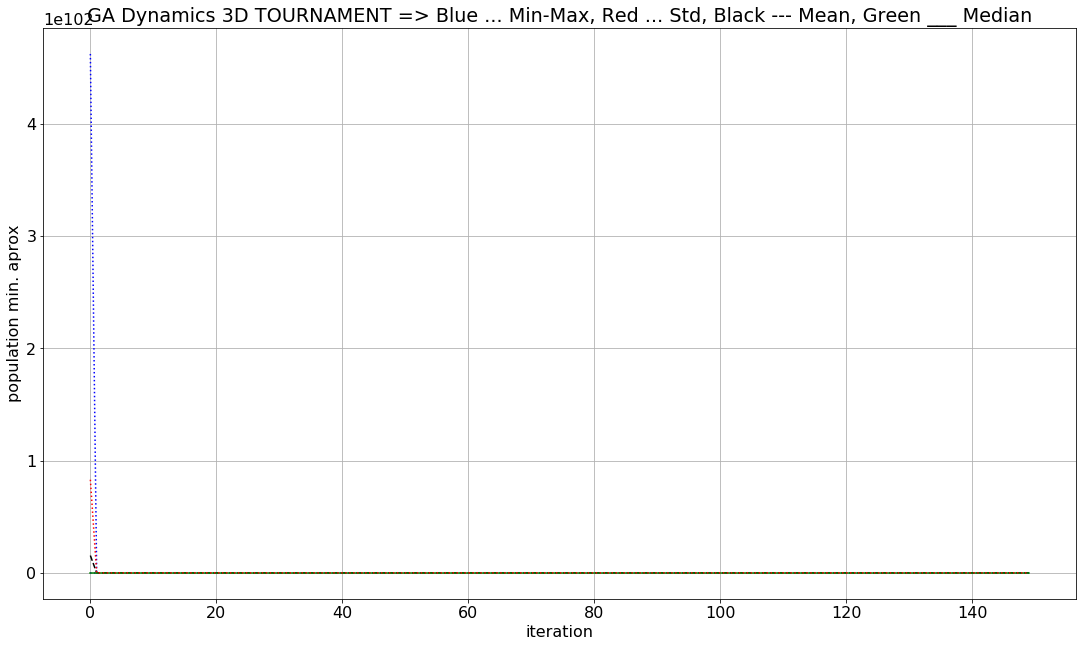

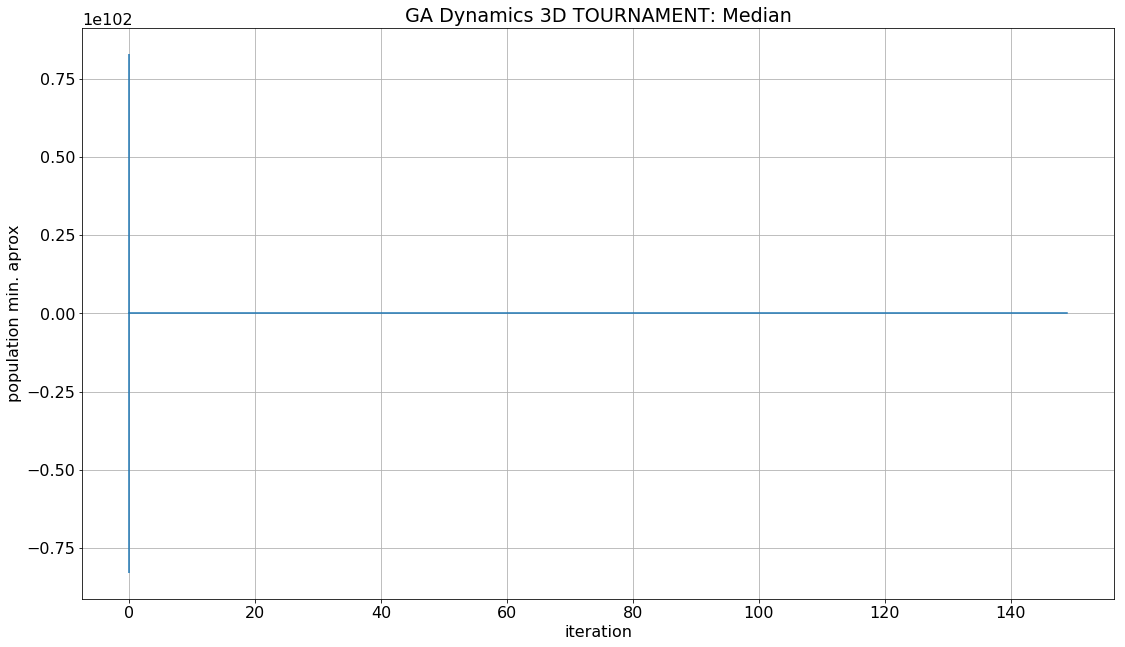

In [205]:
# Generate population
N = 30
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 150
matingPercent = 0.7
mutaPercent = 0.03
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)

    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)])
# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D TOURNAMENT => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsTournamentGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D TOURNAMENT: Median")
plt.grid()
plt.savefig('DynamicsTournamentGAStd_3d.pdf', format='pdf')
plt.show()

## RankWeightingGA 3d

 Iteration 149

Last fit info______
Last fit mean: 2.760226971722316e+88
Last fit std: 1.4864277147822464e+89
Last fit median: 22034386.747412886
Last fit min: 5.073264006292481
Last fit max: 8.280680915166948e+89
Last Pop info______
Last Pop mean: [36.29573198 54.75908783 16.19251402]
Last Pop std: [ 90.31497216 112.9384987   55.87761405]
Last Pop median: [ 0.26495147 15.35419333  0.17999879]
Last Pop min: [0.07857371 6.60759488 0.02890325]
Last Pop max: [309.44842841 505.86267901 300.02890108]
5.073264006292481
[ 0.13465143 16.03273445  0.15770069]


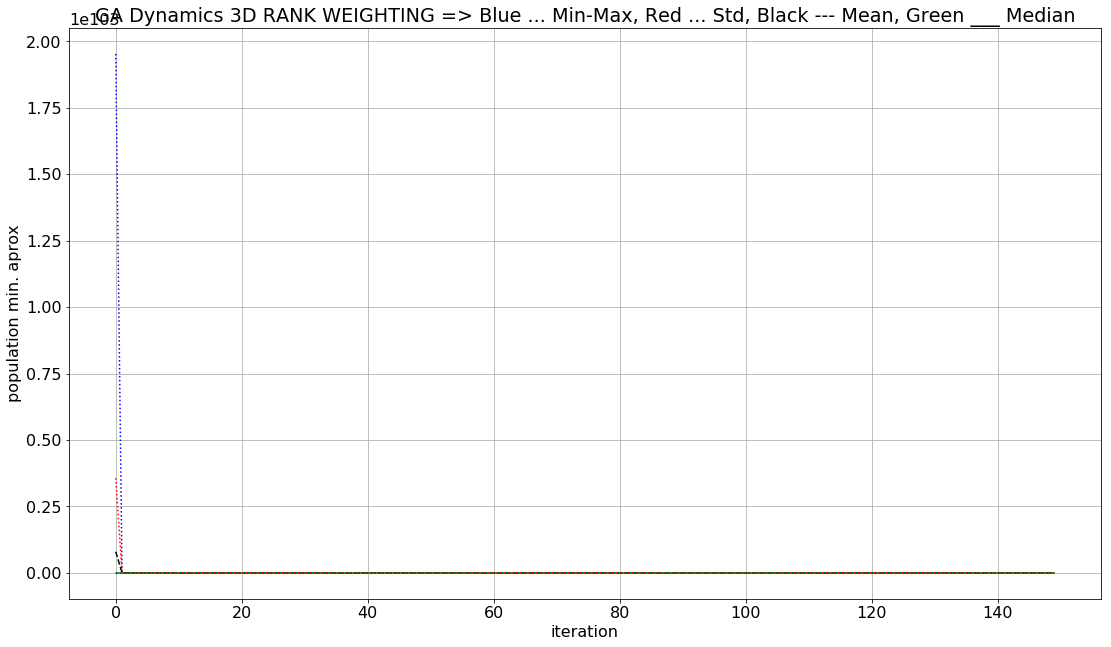

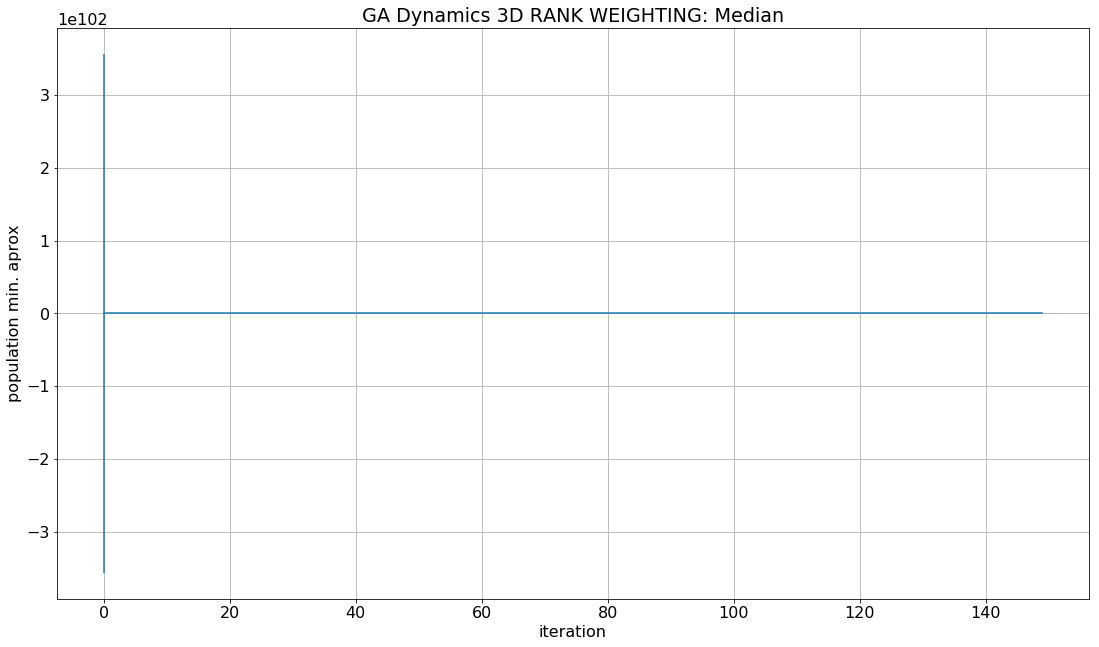

In [206]:
# Generate population
N = 30
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 150
matingPercent = 0.7
mutaPercent = 0.03
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,rankWeighting = ga.rankWeighting(fitList,fitVal,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, rankWeighting, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)]) 

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D RANK WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsRankWeightingGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D RANK WEIGHTING: Median")
plt.grid()
plt.savefig('DynamicsRankWeightingGAStd_3d.pdf', format='pdf')
plt.show()

## CostWeightingGA 3d 

 Iteration 149

Last fit info______
Last fit mean: 1927753086.9662127
Last fit std: 47582488.6123212
Last fit median: 1912109594.7018409
Last fit min: 1902231871.3369656
Last fit max: 2168842929.287183
Last Pop info______
Last Pop mean: [416.59776417 596.05774095   3.30325657]
Last Pop std: [2.27903933 1.68282761 3.39302454]
Last Pop median: [418.42734067 596.37045076   2.76558122]
Last Pop min: [413.74041287 586.99545075   2.47254095]
Last Pop max: [418.57382504 596.37216737  21.51558123]
1902231871.3369656
[413.81311862 596.3630121    2.4727558 ]


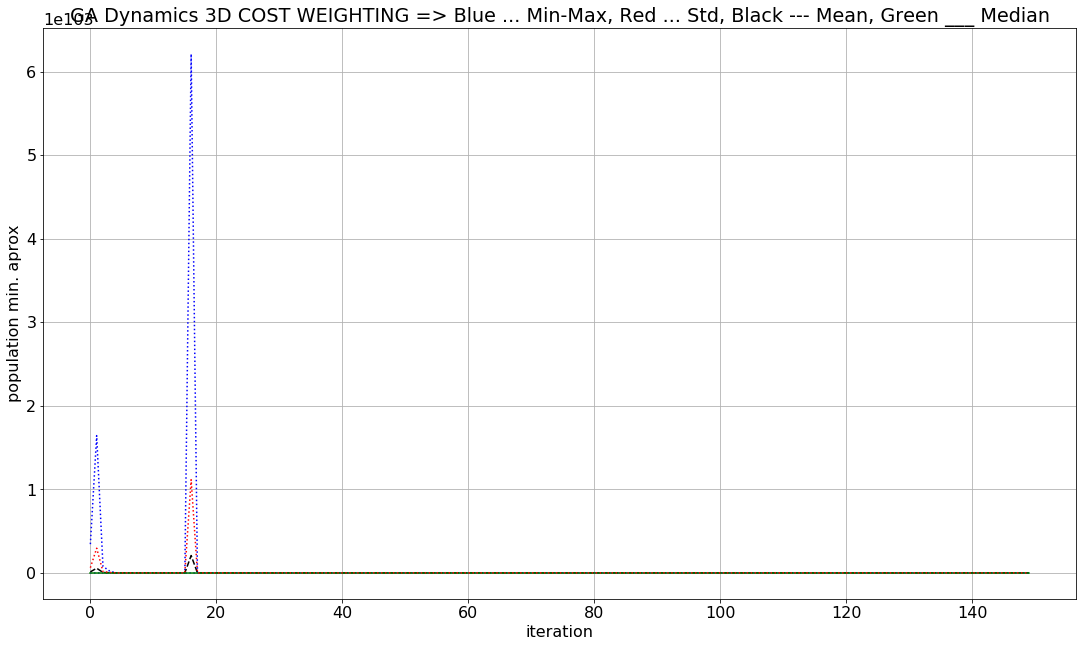

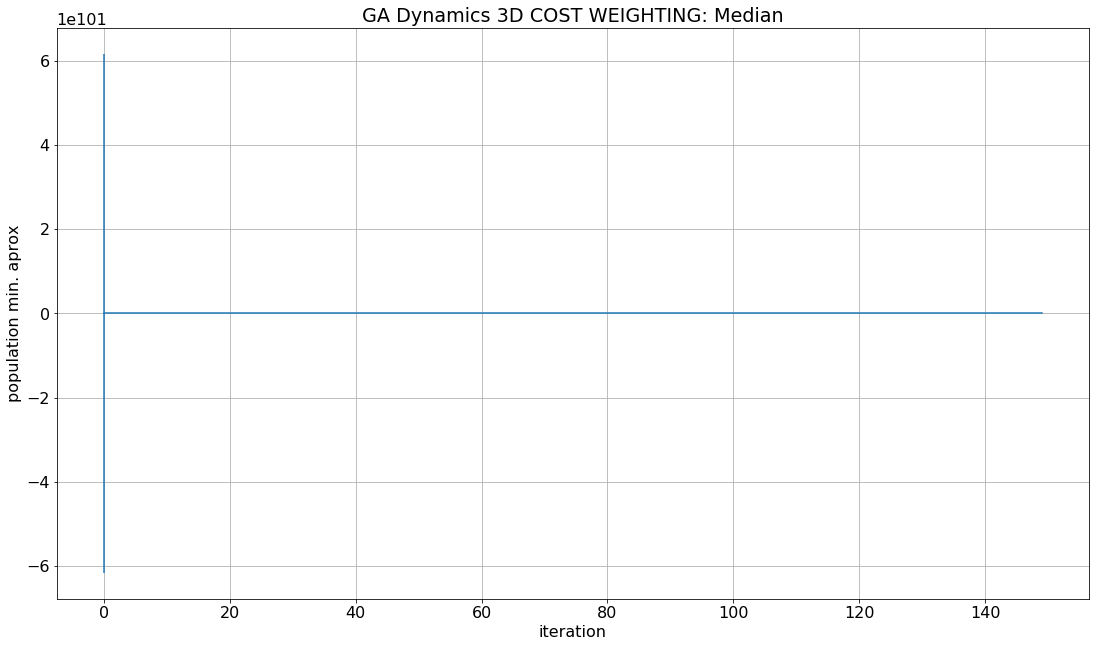

In [207]:
# Generate population
N = 30
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 150
matingPercent = 0.7
mutaPercent = 0.003
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,costWeighting = ga.costWeighting(fitList,fitVal,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, costWeighting, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)])

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D COST WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsCostWeightingGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D COST WEIGHTING: Median")
plt.grid()
plt.savefig('DynamicsCostWeightingGAStd_3d.pdf', format='pdf')
plt.show()

# HAEA

 Iteration 149

Last fit info______
Last fit mean: 5.137939309169161
Last fit std: 1.0982595454289367e-06
Last fit median: 5.137938932407324
Last fit min: 5.137938233910239
Last fit max: 5.13794171070804
Last Pop info______
Last Pop mean: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.96666667
 0.         0.         0.         0.03333333 0.         0.
 0.46666667 0.         0.06666667 1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         

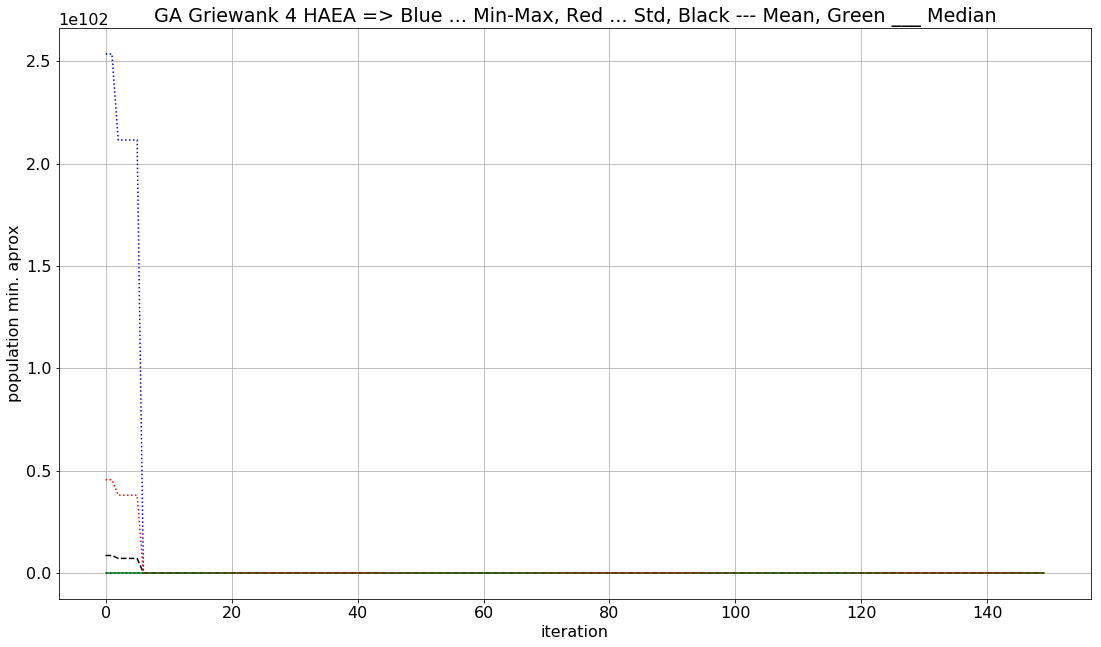

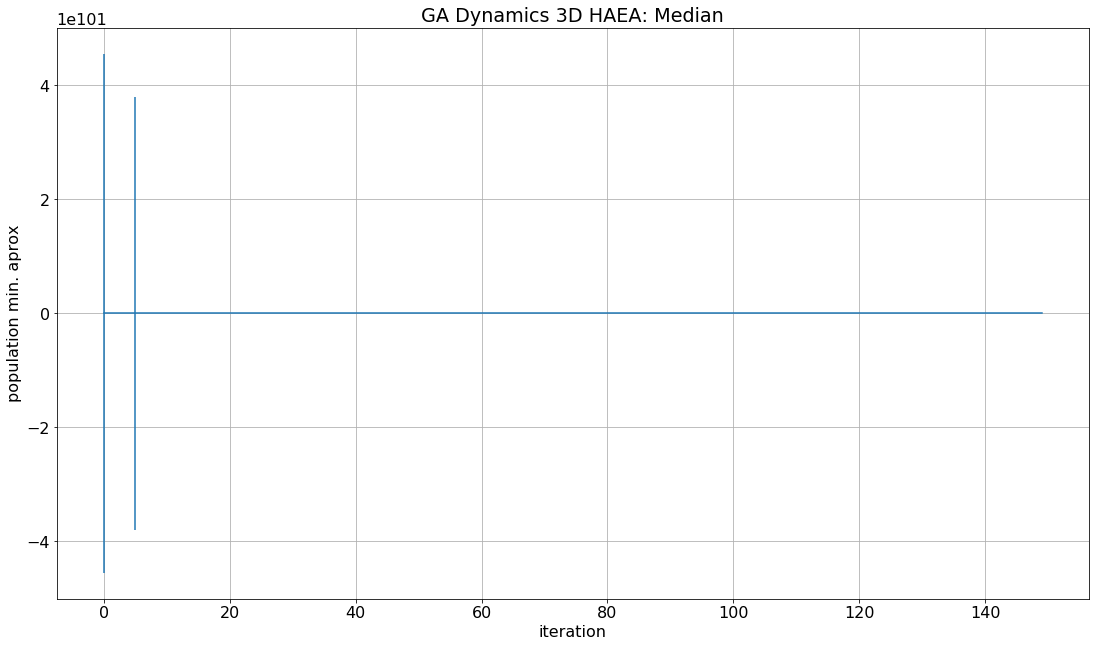

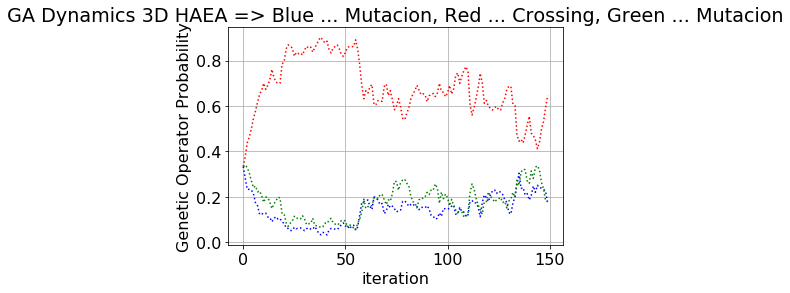

[[3.97951062e-02 9.42918848e-01 1.72860462e-02]
 [5.01474550e-02 7.52290689e-01 1.97561856e-01]
 [1.85182269e-01 8.14572048e-01 2.45682437e-04]
 [2.75919405e-01 4.22611047e-01 3.01469548e-01]
 [1.02286056e-01 8.45514921e-01 5.21990230e-02]
 [1.23980740e-01 7.69489960e-01 1.06529300e-01]
 [1.68041960e-01 4.79379744e-01 3.52578297e-01]
 [7.70786084e-02 8.15655072e-01 1.07266320e-01]
 [6.08877768e-02 3.24195779e-01 6.14916444e-01]
 [7.47399881e-02 8.91038212e-01 3.42218003e-02]
 [2.45021858e-02 2.27113832e-01 7.48383982e-01]
 [7.13677757e-02 8.67992405e-01 6.06398194e-02]
 [5.28063765e-01 4.58746084e-01 1.31901510e-02]
 [2.20777360e-01 4.19158650e-01 3.60063990e-01]
 [5.49898965e-01 4.40291335e-01 9.80970036e-03]
 [2.77507357e-03 9.95610106e-01 1.61482028e-03]
 [1.14262068e-01 2.93591513e-01 5.92146419e-01]
 [8.72831279e-02 7.95146433e-01 1.17570439e-01]
 [2.59190006e-01 5.71547991e-01 1.69262002e-01]
 [5.88906420e-02 8.30943086e-01 1.10166272e-01]
 [3.47831676e-02 7.08559076e-01 2.566577

In [208]:
# Generate population
N = 30
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
# Not used
lnrate = 1
mutationP = 1/d
iterations = 150
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# print(gopp)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    children,gopp = ga.haeaMin(Pop, pselect, gopp, fitList, zyz1CloseLoopBinString, mutationP, lnrate)
    
    Pop = children
    # print("New Population")
    # print(Pop)
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)]) 

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Griewank 4 HAEA => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('GriewankHaeaGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:5] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D HAEA: Median")
plt.grid()
plt.savefig('DynamicsHaeaGAStd_3d.pdf', format='pdf')
plt.show()


plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:',)

plt.ylabel('Genetic Operator Probability')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D HAEA => Blue ... Mutacion, Red ... Crossing, Green ... Mutacion")
plt.grid()
plt.savefig('geneticOperatorDynamics_3d.pdf', format='pdf')
plt.show()

print(gopp)

# Evolution strategies

 Iteration 149

Last fit info______
Last fit mean: 676780562.1726954
Last fit std: 2140873.1319351126
Last fit median: 677680934.8084829
Last fit min: 671201981.620119
Last fit max: 678866759.9188713
Last Pop info______
Last Pop mean: [67.46398607 78.87111828  7.79587875]
Last Pop std: [0.10801486 0.06340755 0.02060305]
Last Pop median: [67.50286693 78.8604791   7.80068542]
Last Pop min: [67.14371214 78.75968943  7.73829064]
Last Pop max: [67.57353896 78.99600537  7.82607942]
671201981.620119
[67.5562627  78.79525038  7.79940589]


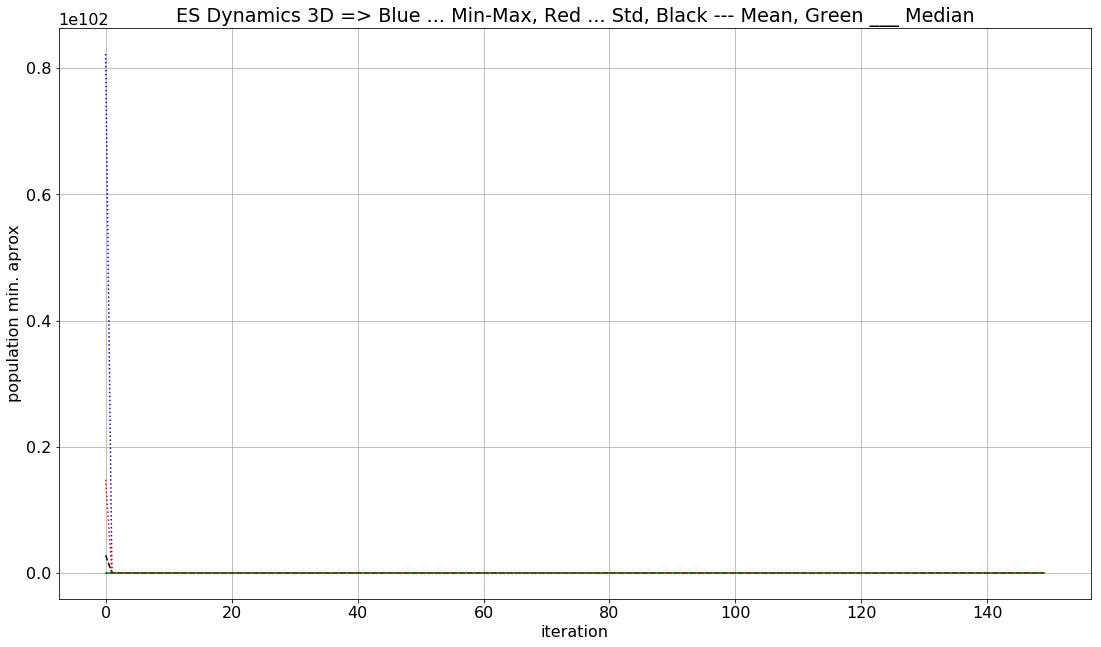

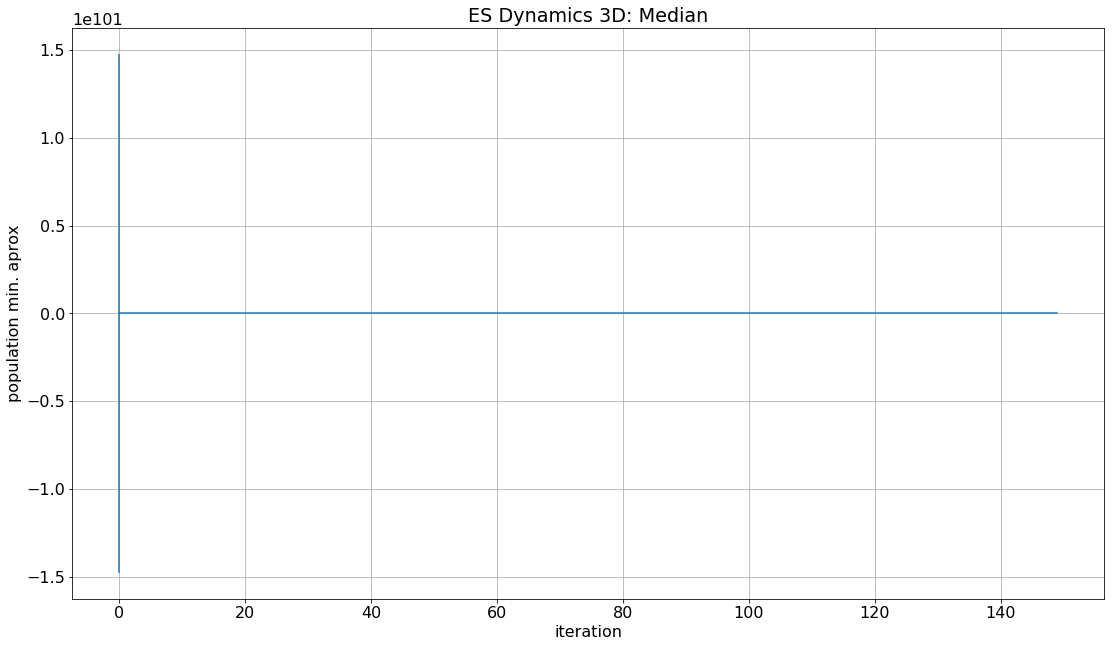

In [12]:
minVal = 0
maxVal = UPPER_VAL_LIMIT
iterations = 150
# Dimentions
d = 3
# Population
Np = 30
N = np.random.uniform(minVal,maxVal,(Np,d))
ns = np.random.uniform(0.01,0.2,(Np,d))

# M = np.random.uniform(0.01,1,(Np,d,d))
# ms = np.random.uniform(0.01,0.2,(Np,d,d))

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    tournamentPairs = ga.tournamentSelectionIndexes(N, fitList, Np)
    # Reconbination and Mutation for children generation
    children_N,children_ns = ga.es_ChildrenGeneration(N,ns,tournamentPairs,minVal,maxVal)
    children_fitList = ga.popfitnes4ES(pop = children_N, funct = wrappedzyz1CloseLoop)
    
    newPop, newPop_s = ga.es_childreAndParentsSelection(N,ns,fitList,children_N,children_ns,children_fitList)
    
    N,ns = newPop, newPop_s
    
fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
# print(fitList)
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(N, axis=0)))
print('Last Pop std: ' + str(np.std(N, axis=0)))
print('Last Pop median: ' + str(np.median(N, axis=0)))
print('Last Pop min: ' + str(np.amin(N, axis=0)))
print('Last Pop max: ' + str(np.amax(N, axis=0)))

print(fitList[np.argmin(fitList)])
print(N[np.argmin(fitList)])



# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES Dynamics 3D => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsES_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES Dynamics 3D: Median")
plt.grid()
plt.savefig('DynamicsESStd_10d.pdf', format='pdf')
plt.show()    

# Evolution strategies + Rotation Matrix

 Iteration 149

Last fit info______
Last fit mean: 2255638546.173268
Last fit std: 2193450.743021633
Last fit median: 2256244635.000782
Last fit min: 2249903618.358103
Last fit max: 2258572869.4310284
Last Pop info______
Last Pop mean: [279.59572098 284.63207742   7.07207721]
Last Pop std: [0.85318817 0.26570916 0.08949736]
Last Pop median: [279.87285137 284.63713296   7.08446987]
Last Pop min: [277.72100008 284.15908772   6.90716648]
Last Pop max: [281.04665854 285.07525724   7.25592472]
2249903618.358103
[277.72100008 284.20437439   6.92261995]


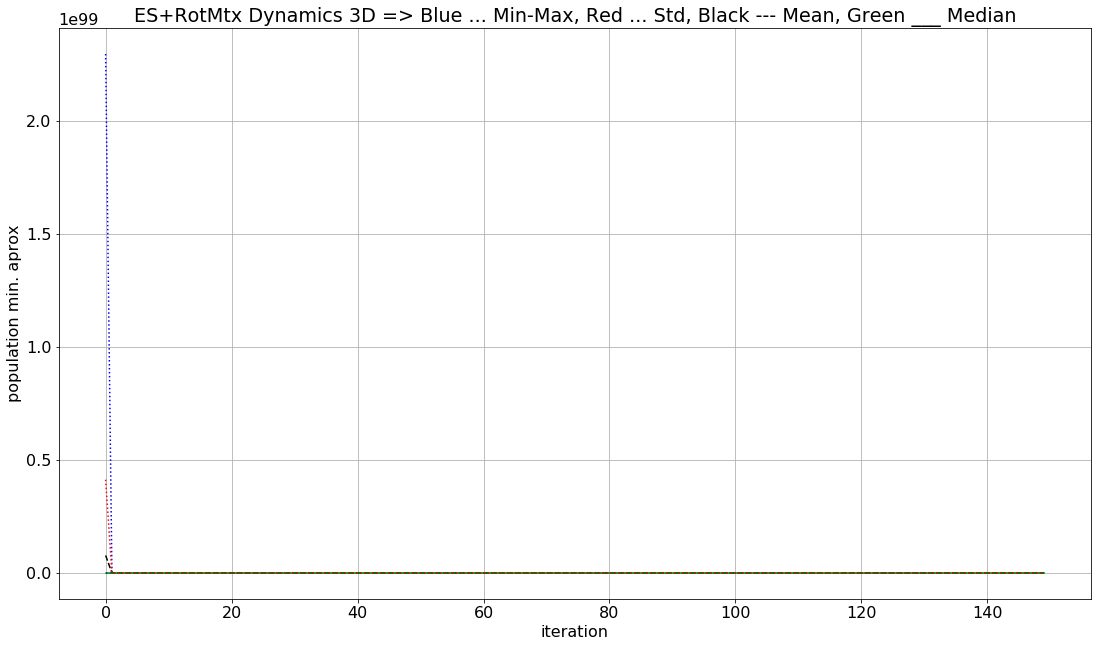

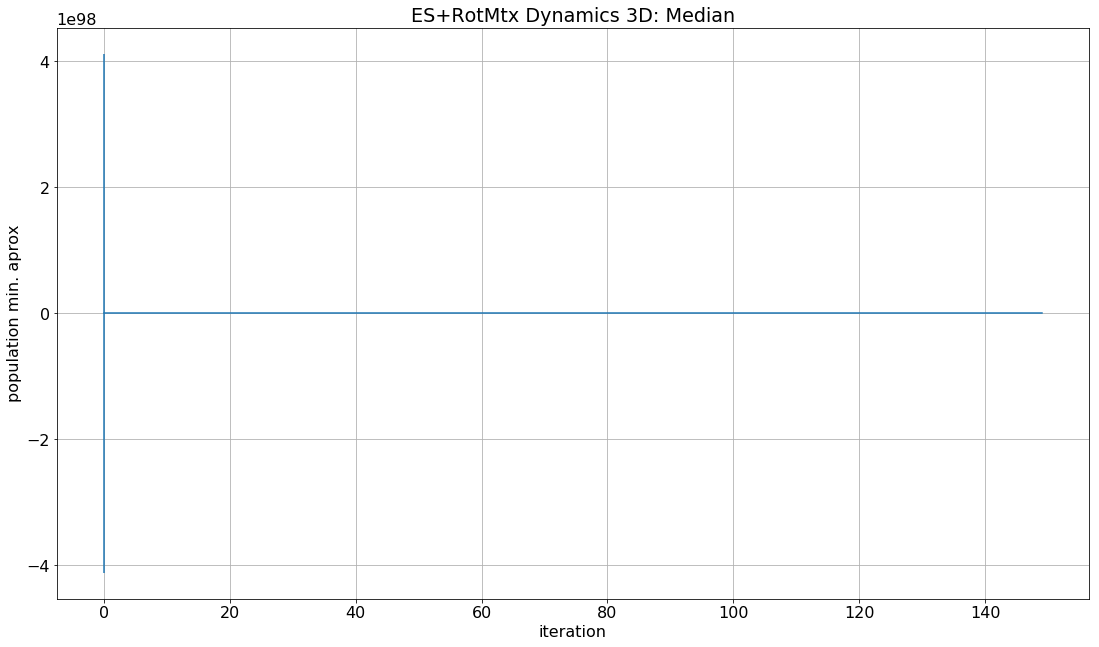

In [13]:
minVal = 0
maxVal = UPPER_VAL_LIMIT
iterations = 150
# Dimentions
d = 3
# Population
Np = 30
N = np.random.uniform(minVal,maxVal,(Np,d))
ns = np.random.uniform(0.01,0.2,(Np,d))
M = np.random.uniform(0.01,1,(Np,d,d))
ms = np.random.uniform(0.01,0.2,(Np,d,d))

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    tournamentPairs = ga.tournamentSelectionIndexes(N, fitList, Np)
    # Reconbination and Mutation for children generation
    children_N,children_ns,children_M,children_ms = ga.es_ChildrenGenerationMtx(N,ns,M,ms,tournamentPairs,minVal,maxVal)
    children_fitList = ga.popfitnes4ES(pop = children_N, funct = wrappedzyz1CloseLoop)
    
    newPop,newPop_s,newPop_M,newPop_ms = ga.es_childreAndParentsSelectionMtx(N,
                                                                             ns,
                                                                             M,
                                                                             ms,
                                                                             fitList,
                                                                             children_N,
                                                                             children_ns,
                                                                             children_M,
                                                                             children_ms,
                                                                             children_fitList)
    
    N,ns,M,ms = newPop,newPop_s,newPop_M,newPop_ms
    
fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
# print(fitList)
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(N, axis=0)))
print('Last Pop std: ' + str(np.std(N, axis=0)))
print('Last Pop median: ' + str(np.median(N, axis=0)))
print('Last Pop min: ' + str(np.amin(N, axis=0)))
print('Last Pop max: ' + str(np.amax(N, axis=0)))

print(fitList[np.argmin(fitList)])
print(N[np.argmin(fitList)])
# print(fitVal[np.argmin(N)])

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES+RotMtx Dynamics 3D => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsESRotMtx_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:5] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES+RotMtx Dynamics 3D: Median")
plt.grid()
plt.savefig('DynamicsESRotMtxStd_3d.pdf', format='pdf')
plt.show()

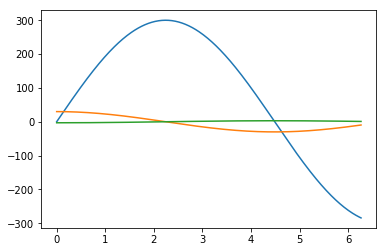

In [22]:
x = (np.linspace(0, 359, 360)*np.pi)/180
plt.plot(x, 300*np.sin(x*0.7) )
plt.plot(x, 30*np.sin(x*0.7 + np.pi/2) )
plt.plot(x, 3*np.sin(x*0.7 - np.pi/2) )
plt.show()